# Introduction

`Fit-DCS` is a Python toolbox for modeling and analyzing diffuse correlation spectroscopy (DCS) data. It provides tools for both forward modeling
and inverse fitting of DCS autocorrelation functions, allowing users to extract information about scatterer dynamics in turbid media.

This Jupyter Notebook provides an introduction to the main features of the `Fit-DCS` toolbox, complete with code examples and exercises to familiarize
users with its capabilities.

# Forward modeling

The simplest use of this toolbox is the modeling of the forward problem, that is, given the information on the scatterer dynamics
(Brownian diffusion coefficient `db` and/or mean square velocity `v_ms` depending on the scatterer model) and the geometry (e.g., semi-infinite,
slab, ...) calculate the corresponding autocorrelation functions `g1` and `g2`.

The `forward` module contains the expressions for the normalized and unnormalized first-order autocorrelations `g1_norm` and `g1`
obtained in the framework of the diffusion approximation to the correlation transport equation.
It contains one submodule per geometry: for example, `forward.homogeneous_inf` contains the solution for the homogeneous
semi-infinite geometry, `forward.homogeneous_slab` the ones for the homogeneous laterally infinite slab, and so on.

In addition to a geometric model, we also need a model for scatterer motion. These can be found in `forward.common`, and include
Brownian motion, ballistic motion and hybrid motion with both components.

## Semi-infinite geometry

We'll start with a simple example of forward modeling in a semi-infinite geometry with Brownian motion.
First of all, let's import the necessary modules and define the parameters of the simulation.

In [41]:
import numpy as np                                          # Arrays
import matplotlib.pyplot as plt                             # Plotting
from matplotlib.lines import lineStyles

from fit_dcs.forward import common                          # Common functions (e.g., scatterer motion models)
from fit_dcs.forward import homogeneous_semi_inf as hsi     # Semi-infinite geometry

tau = np.logspace(-8, 0, 200)               # Delay times, s
lambda0 = 785                               # Wavelength, nm
mua = 0.1                                   # Absorption coefficient, 1/cm
musp = 10                                   # Reduced scattering coefficient, 1/cm
rho = 2.5                                   # Source-detector separation, cm
n = 1.4                                     # Refractive index of the medium (external is 1)
db = 1e-8                                   # Brownian diffusion coefficient, cm^2/s
beta = 0.5                                  # Coherence of detected light

Note that, in order to be flexible, the geometric models in `Fit-DCS` do not take directly the Brownian diffusion coefficient `db` as input,
but rather the mean-square displacement (MSD) as a function of delay time `tau`.
This allows the user to define custom scatterer motion models if needed.

For simple Brownian motion, we can use the helper function `msd_brownian` in the `common` module to compute the MSD.

In [42]:
msd = common.msd_brownian(tau, db)
g1_norm = hsi.g1_norm(msd, mua, musp, rho, n, lambda0)

We can now compute the second-order autocorrelation function `g2` using the Siegert relation and plot the results.

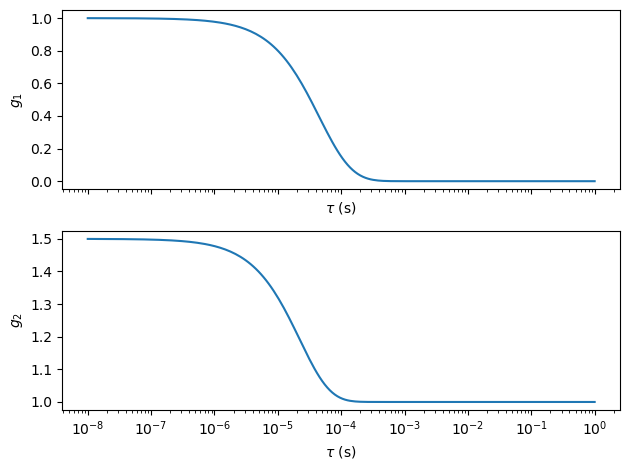

In [43]:
g2_norm = 1 + beta * g1_norm**2

def plot_g1_g2(tau, g1, g2, labels=None):
    """
    Helper function to plot g1 and g2. Supports multiple curves with labels.
    """
    fig, axs = plt.subplots(2, 1, sharex=True)
    axs[0].semilogx(tau, g1.T, label=labels)
    axs[0].set_xlabel(r'$\tau$ (s)')
    axs[0].set_ylabel(r'$g_1$')
    if labels is not None:
        axs[0].legend()

    axs[1].semilogx(tau, g2.T, label=labels)
    axs[1].set_xlabel(r'$\tau$ (s)')
    axs[1].set_ylabel(r'$g_2$')
    if labels is not None:
        axs[1].legend()
    plt.tight_layout()
    plt.show()

plot_g1_g2(tau, g1_norm, g2_norm)

Let's now try different values of the Brownian diffusion coefficient `db` and see how they affect the autocorrelation functions.
We will define `g1` as a 2D array whose axes are `(db, tau)`, and loop over different `db` values to compute `g1` for each.
This 2D structure for `g1` and `g2` is what is expected by data analysis classes, where the first axis corresponds to
different iterations and the second axis to delay times.

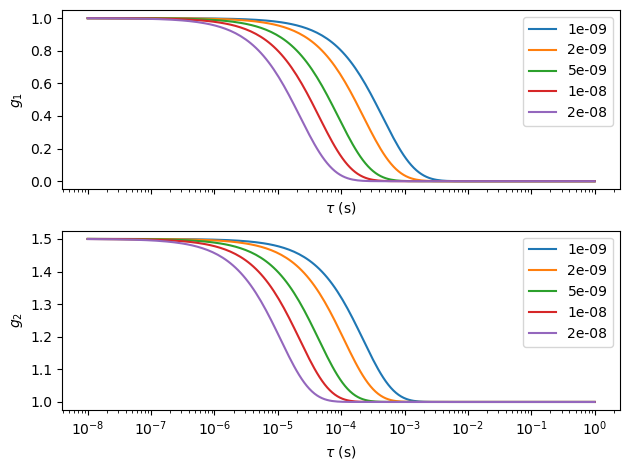

In [44]:
db_vals = [1e-9, 2e-9, 5e-9, 1e-8, 2e-8]
g1_all = np.zeros((len(db_vals), len(tau)))
for i, db in enumerate(db_vals):
    msd = common.msd_brownian(tau, db)
    g1_all[i, :] = hsi.g1_norm(msd, mua, musp, rho, n, lambda0)
g2_all = 1 + beta * g1_all**2

plot_g1_g2(tau, g1_all, g2_all, labels=db_vals)  # We can pass the db values to be used in the legend

Now try writing some code to simulate `g1` and `g2` for the same geometry but with ballistic scatterer motion.
Use the function `common.msd_ballistic` to compute the mean-square displacement for ballistic motion.
Hover over the function name to see its documentation, including the input parameters.

C:\Users\marco\AppData\Local\Temp\ipykernel_21044\2588604335.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
C:\Users\marco\AppData\Local\Temp\ipykernel_21044\2588604335.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


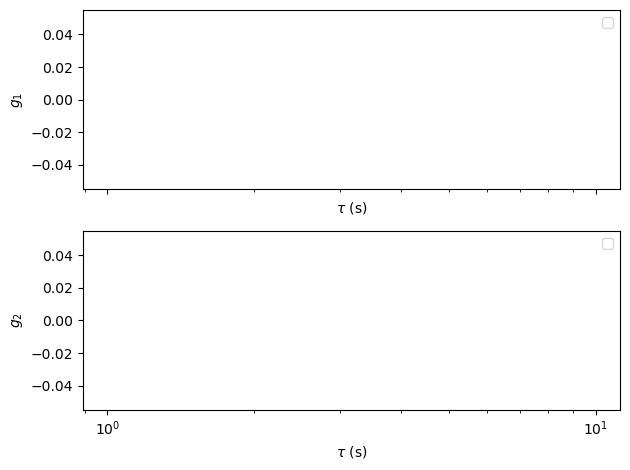

In [45]:
v_ms_vals = []  # Your code here... (mean square velocities, (cm/s)^2)
g1_all = np.zeros((len(v_ms_vals), len(tau)))
g2_all = np.zeros((len(v_ms_vals), len(tau)))

# Your code here...

plot_g1_g2(tau, g1_all, g2_all, labels=v_ms_vals)

Finally, also try simulating `g1` and `g2` for a hybrid motion model with both Brownian and ballistic components.
You can use the function `common.msd_hybrid` to compute the mean-square displacement for hybrid motion.

C:\Users\marco\AppData\Local\Temp\ipykernel_21044\2588604335.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
C:\Users\marco\AppData\Local\Temp\ipykernel_21044\2588604335.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


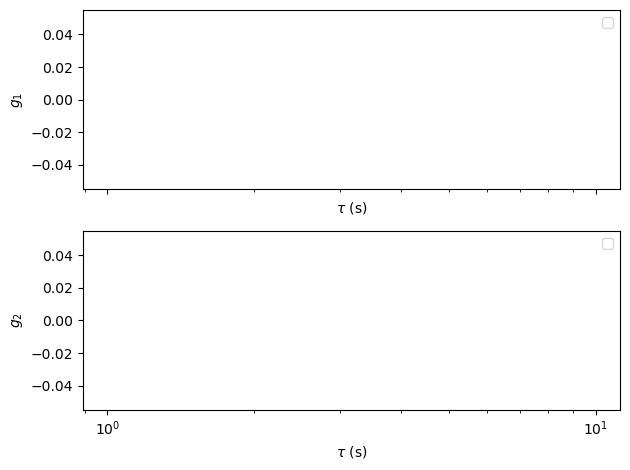

In [46]:
db_vals = []  # Your code here...
v_ms = 1e-4
g1_all = np.zeros((len(db_vals), len(tau)))
g2_all = np.zeros((len(db_vals), len(tau)))

# Your code here...

plot_g1_g2(tau, g1_all, g2_all, labels=db_vals)

## Slab geometry

The procedure for forward modeling in a slab geometry is similar to the semi-infinite case.
We just need to import the appropriate module (`forward.homogeneous_inf_slab`) and define the additional
parameters for the slab geometry.
Since the theoretical model requires a sum over multiple image sources, we also need to define the number
of image sources to include in the calculation (`m_max`).

Note that two solutions are available for the slab geometry, one in reflectance (`g1_reflectance_norm`)
and one in transmittance (`g1_transmittance_norm`).

Let's see an example.

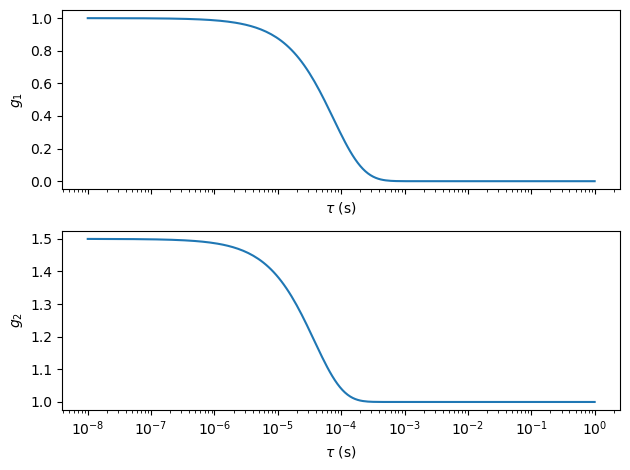

In [47]:
from fit_dcs.forward import homogeneous_inf_slab as slab

d = 0.5                                   # Slab thickness, cm
m_max = 10                                # Number of image sources to include
rho = 2.5                                 # Lateral source-detector separation, cm
db = 1e-8

msd = common.msd_brownian(tau, db)
g1_norm = slab.g1_reflectance_norm(msd, mua, musp, rho, n, lambda0, d, m_max)

g2_norm = 1 + beta * g1_norm**2
plot_g1_g2(tau, g1_norm, g2_norm)


Now try to verify that the slab solution in reflectance is the same as the semi-infinite solution
when we only consider the first image source (i.e., set `m_max = 0`).

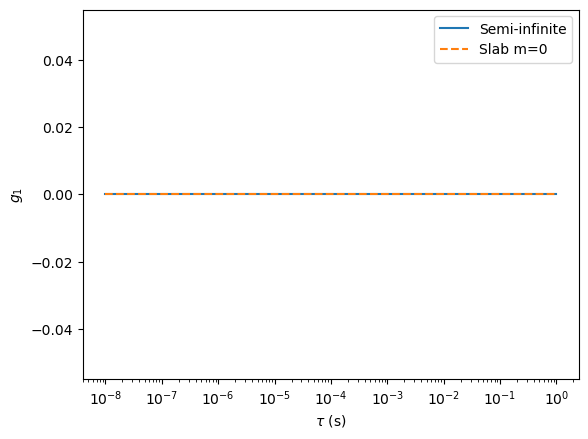

In [48]:
g1_semi_inf = np.zeros_like(tau)
g1_slab_m0 = np.zeros_like(tau)

# Your code here...

# Plotting
plt.semilogx(tau, g1_semi_inf, label='Semi-infinite')
plt.semilogx(tau, g1_slab_m0, '--', label='Slab m=0')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$g_1$')
plt.legend()
plt.show()

Finally, let's study the convergence of the slab solution as we increase the number of image sources `m_max`.
Try simulating `g1` and `g2` in the transmittance geometry for different values of `m_max`.

C:\Users\marco\AppData\Local\Temp\ipykernel_21044\2588604335.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
C:\Users\marco\AppData\Local\Temp\ipykernel_21044\2588604335.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


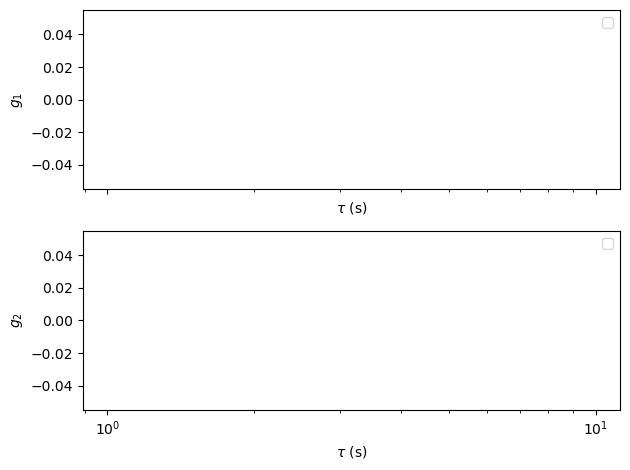

In [49]:
mua = 0.05
musp = 10
d = 0.5
rho = 2  # Lateral source-detector separation, it's usually 0 in transmittance
db = 1e-8
msd = common.msd_brownian(tau, db)
m_max_vals = []  # Your code here...

g1_all = np.zeros((len(m_max_vals), len(tau)))
g2_all = np.zeros((len(m_max_vals), len(tau)))

# Your code here...

plot_g1_g2(tau, g1_all, g2_all, labels=m_max_vals)

The parameters defined above were chosen to highlight the effect of increasing `m_max`. Try changing them
to see how they affect the convergence behavior. You should observe that higher absorption coefficients, thicker slabs,
and shorter source-detector separations require fewer image sources for convergence.

## Two-layer geometry

Finally, let's simulate the autocorrelation for a two-layer geometry.
The appropriate `g1_norm` function can be found in the `forward.bilayer` module.

The main difference with respect to the previous cases is that now we are dealing with two different media,
each with its scatterer motion. As such, in `forward.bilayer.g1_norm`, the `msd` argument is a 2D array of shape
`(2, len(tau))`, such that `msd[0, :]` is the mean-square displacement for the upper layer's scatterers and
`msd[1, :]` is the one relative to the lower layer. Of course, the scatterer motion models can be different in the two layers.

Additionally, the analytical expression contains an integration over all (positive) spatial frequencies, which in the
implementation is truncated to the interval `(0, q_max)`, where `q_max` is an input parameter.

Let's see an example. For simplicity, we'll consider Brownian motion in both layers.

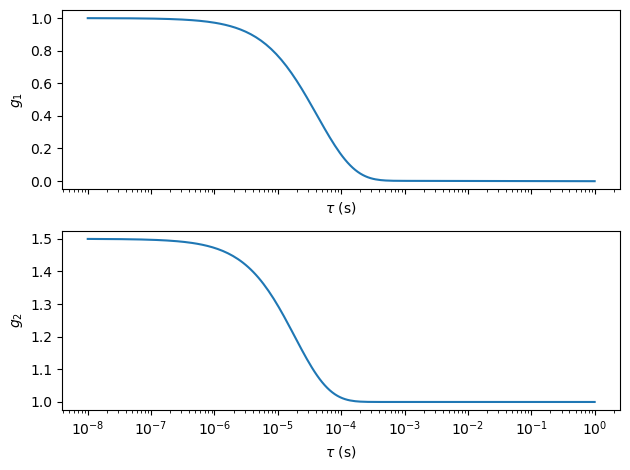

In [50]:
import fit_dcs.forward.bilayer as bilayer

db_up = 1e-8
db_dn = 6e-8
msd_up = common.msd_brownian(tau, db_up)
msd_dn = common.msd_brownian(tau, db_dn)
msd = np.vstack((msd_up, msd_dn))  # Shape (2, len(tau))
mua_up = 0.1
mua_dn = 0.2
musp_up = 8
musp_dn = 10
n = 1.4
d = 1  # Thickness of the upper layer, cm
rho = 3
q_max = 80  # 1/cm

g1_norm = bilayer.g1_norm(msd, mua_up, mua_dn, musp_up, musp_dn, n, d, rho, lambda0, q_max)
g2_norm = 1 + beta * g1_norm**2

plot_g1_g2(tau, g1_norm, g2_norm)

To study the convergence of the solution, try simulating `g1` and `g2` for different values of `q_max`.

C:\Users\marco\AppData\Local\Temp\ipykernel_21044\2588604335.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
C:\Users\marco\AppData\Local\Temp\ipykernel_21044\2588604335.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


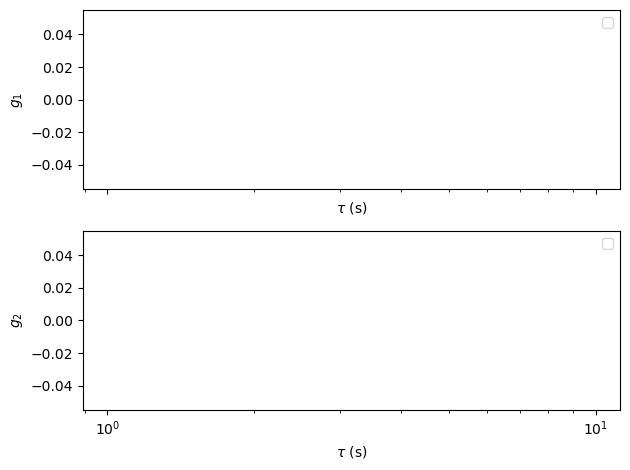

In [51]:
q_max_vals = []  # Your code here...
g1_all = np.zeros((len(q_max_vals), len(tau)))
g2_all = np.zeros((len(q_max_vals), len(tau)))

# Your code here...

plot_g1_g2(tau, g1_all, g2_all, labels=q_max_vals)

Now try investigating the effect of the lower layer's Brownian diffusion coefficient `db_dn` on the autocorrelation functions.
You should use a value of `q_max` that ensures convergence, which you can determine from the previous exercise.

C:\Users\marco\AppData\Local\Temp\ipykernel_21044\2588604335.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0].legend()
C:\Users\marco\AppData\Local\Temp\ipykernel_21044\2588604335.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


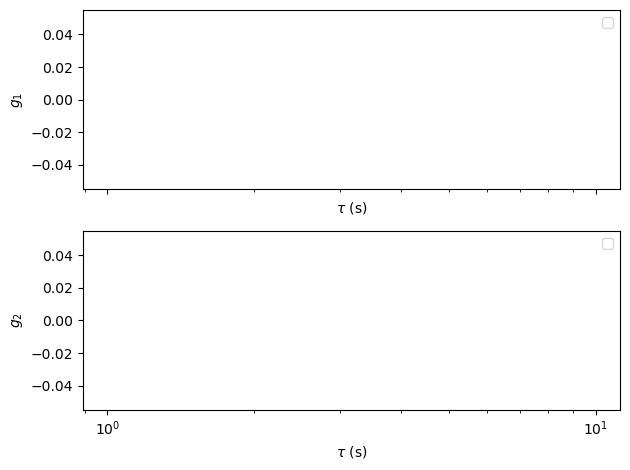

In [52]:
db_dn_vals = []  # Your code here...
g1_all = np.zeros((len(db_dn_vals), len(tau)))
g2_all = np.zeros((len(db_dn_vals), len(tau)))

# Your code here...

plot_g1_g2(tau, g1_all, g2_all, labels=db_dn_vals)

Finally, repeat the previous exercise with a different source-detector separation `rho`.
You should observe that the sensitivity to the lower layer's dynamics increases with `rho`.

You are also free to change other parameters (e.g., upper layer thickness `d`, scatterer motion model, ...) to see how they affect the results.

## Adding noise

So far all the curves we generated were noiseless, as they were obtained using the analytical solutions to the correlation diffusion equation.
In this section, we will see how to add realistic noise to the simulated `g2` curves.

The `utils.noise` module offers noise-related functionalities, most importantly the expression for the standard deviation of `g2_norm` as a
function of time delay `tau`.
This model was obtained for an exponentially decaying `g2_norm`, that is, `g2_norm = 1 + beta * exp(-tau/tau_c)`, which works best at short
time delays.

Let's plot the standard deviation. To get more realistic results, we will load the `tau` which comes from a hardware correlator,
rather than creating it ourselves as we did earlier. Additionally, the standard deviation depends on integration time, measurement countrate,
decay time constant, and number of detected speckles, so we will need to define those as well.

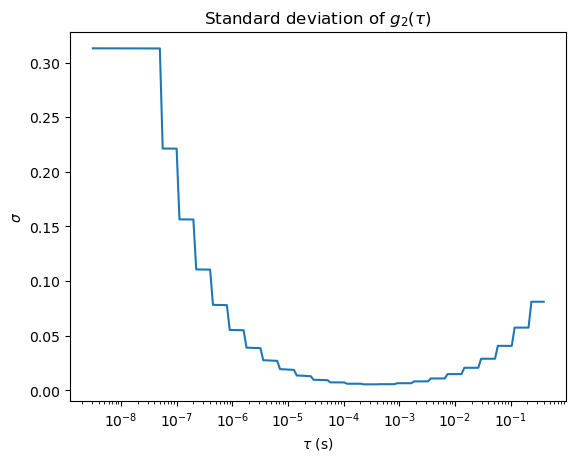

In [53]:
from fit_dcs.utils import noise

tau = np.load("data/tau.npz")["tau_hardware"]

t_integration = 1   # Integration time, s
countrate = 70_000  # Measurement countrate, Hz
tau_c = 1e-5        # Exponential decay time constant, s
n_speckle = 1       # Number of speckles detected in parallel
sigma = noise.sigma_g2_norm(tau, t_integration, countrate, beta, tau_c, n_speckle)

# Plotting
plt.semilogx(tau, sigma)
plt.xlabel(r"$\tau$ (s)")
plt.ylabel(r"$\sigma$")
plt.title(r"Standard deviation of $g_2 (\tau)$")
plt.show()

We notice two features about this plot:
1. First, the step-like behavior, which stems from the stepped bin width used in the correlator.
2. Second, the non-decreasing trend: while the noise initially decreases with `tau`, it later increases again starting from about 1 ms.
This behavior is inconsistent with experimental observations, which show a decreasing trend over the whole time delay range.
This failure of the noise model at high delays has been previously observed in the scientific literature.

Depending on our application, we might want to modify the output of this function, for example by manually setting `sigma`
at the late bins to its minimum value to ensure a decreasing trend:

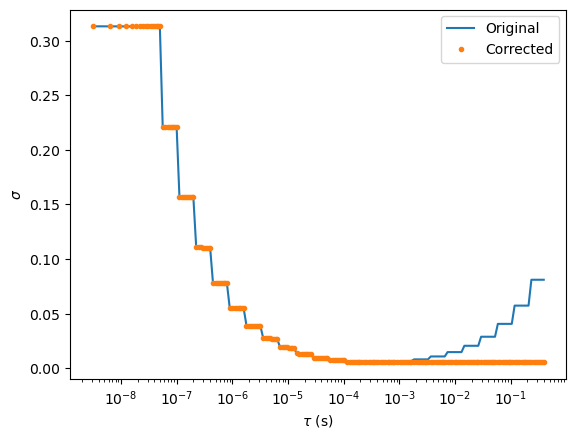

In [54]:
idx_last_good = np.argmin(sigma)
sigma_corrected = sigma.copy()
sigma_corrected[idx_last_good + 1:] = sigma_corrected[idx_last_good]
plt.semilogx(tau, sigma, label="Original")
plt.semilogx(tau, sigma_corrected, linestyle="", marker=".", label="Corrected")
plt.xlabel(r"$\tau$ (s)")
plt.ylabel(r"$\sigma$")
plt.legend()
plt.show()

Now that we have the noise model, we can use it to add noise to our autocorrelation curves to mimic a real measurement. To do this,
once we have calculated the noiseless `g2_norm`, we will sample from a Gaussian distribution with mean `g2_norm` and standard deviation
`sigma`.

Remember that the `sigma_g2_norm` function takes as input `tau_c`, the time constant of the exponential decay. To estimate this, the
`g2_norm` curve should be fitted with the exponential function defined above.

The `noise` module provides a `NoiseAdder` class that automates this process. The constructor take as input the integration time,
countrate, beta, and number of speckles, while the `add_noise` method takes `tau` and `g2_norm` as inputs and returns the noisy
`g2_norm_noisy`.

Let's see an example. For simplicity's sake, we'll use the semi-infinite geometry with Brownian motion again, but the noise addition
can be applied to any `g2_norm` curve.

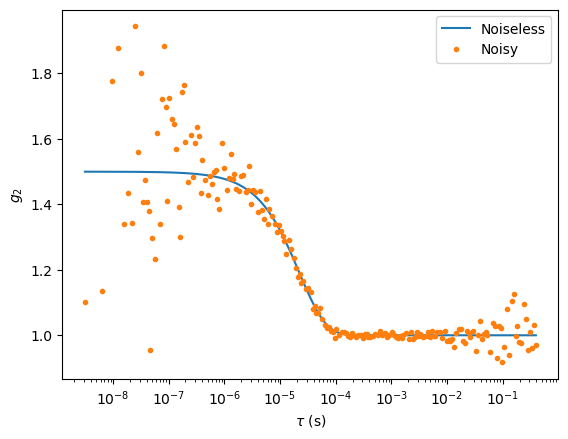

In [55]:
mua = 0.1
musp = 10
rho = 2.5
n = 1.4
db = 1e-8
beta = 0.5

msd = common.msd_brownian(tau, db)
g1_norm = hsi.g1_norm(msd, mua, musp, rho, n, lambda0)
g2_norm = 1 + beta * g1_norm**2

t_integration = 1   # Integration time, s
countrate = 70_000  # Measurement countrate, Hz
n_speckle = 1       # Number of speckles detected in parallel

noise_adder = noise.NoiseAdder(t_integration, countrate, beta, n_speckle)
g2_norm_noisy = noise_adder.add_noise(tau, g2_norm)

# Plotting
plt.semilogx(tau, g2_norm, label='Noiseless')
plt.semilogx(tau, g2_norm_noisy, marker='.', linestyle='', label='Noisy')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$g_2$')
plt.legend()
plt.show()

Notice how the noise decreases with increasing `tau`, as expected. However, for large `tau`, it increases again due to
the limitations of the noise model discussed earlier. To mitigate this, the `NoiseAdder` class constructor also accepts
an optional boolean argument `ensure_decreasing` (default `False`): when set to `True`, it applies the correction we saw earlier
to ensure a decreasing noise trend.

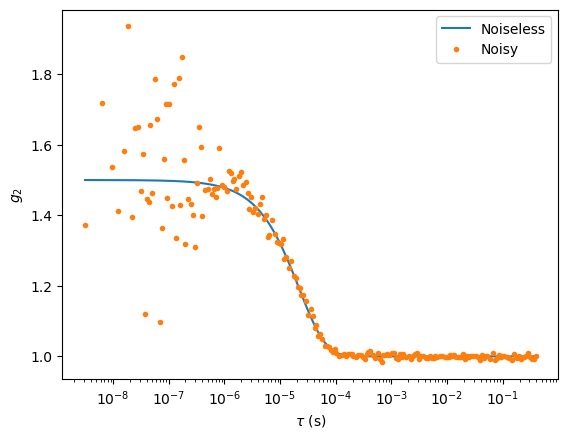

In [56]:
noise_adder = noise.NoiseAdder(t_integration, countrate, beta, n_speckle, ensure_decreasing=True)
g2_norm_noisy = noise_adder.add_noise(tau, g2_norm)

# Plotting
plt.semilogx(tau, g2_norm, label='Noiseless')
plt.semilogx(tau, g2_norm_noisy, marker='.', linestyle='', label='Noisy')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$g_2$')
plt.legend()
plt.show()

As we can see, now the noise decreases with increasing `tau`, which is more realistic.

Now try simulating several noisy autocorrelation curves for different Brownian diffusion coefficients `db`.
Start by creating the noiseless curves `g2_all`, then use the `NoiseAdder` class to add noise to each of them.
Note that `NoiseAdder` works with 2D arrays as well, so you can pass the entire `g2_all` array at once and get
the noisy version `g2_all_noisy` directly back (just make sure the shape is correct!).

In [ ]:
db_vals = []  # Your code here...

t_integration = 1
countrate = 70_000
n_speckle = 1

g1_all = np.zeros((len(db_vals), len(tau)))
g2_all = np.zeros((len(db_vals), len(tau)))
g2_all_noisy = np.zeros((len(db_vals), len(tau)))

# Your code here...

# Plotting
for i in range(len(db_vals)):
    plt.semilogx(tau, g2_all[i, :], alpha=0.3, color=f"C{i}")
    plt.semilogx(tau, g2_all_noisy[i, :], '.', color=f"C{i}")
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$g_2$')
plt.show()

Finally, try changing the noise parameters (integration time, countrate, number of speckles) to see how they affect the noisy curves.

# Analyzing DCS data

In addition to forward modeling, the `Fit-DCS` toolbox also provides tools for solving the inverse problem, that is,
extracting scatterer dynamics from measured autocorrelation functions. These are implemented in the `inverse` module, which
comprises two submodules: `fit` and `mbl_homogeneous`.

We will start with the `fit` submodule, which contains the general-purpose `Fitter` class for fitting DCS autocorrelation data using
arbitrary forward models.

Let's start by creating some synthetic data to fit. We'll start by simulating `db` changes over time to mimic an occlusion experiment.

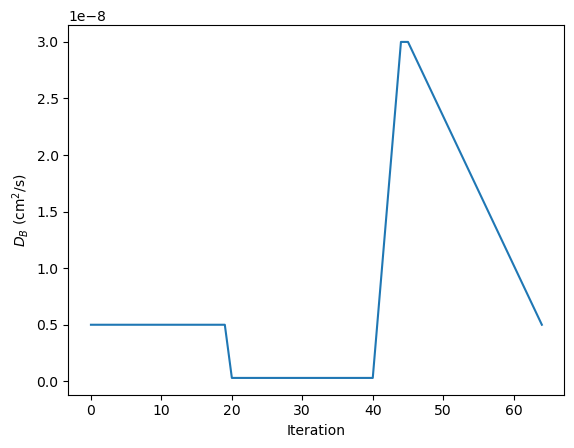

In [58]:
baseline_value = 5e-9
baseline_length = 20
occlusion_value = 3e-10
occlusion_length = 20
peak_value = 6 * baseline_value
rising_time = 5
falling_time = 20
total_dur = baseline_length + occlusion_length + rising_time + falling_time
db = np.zeros(total_dur)
db[:baseline_length] = baseline_value
db[baseline_length:baseline_length + occlusion_length] = occlusion_value
db[baseline_length + occlusion_length:baseline_length + occlusion_length + rising_time] = np.linspace(occlusion_value, peak_value, rising_time)
db[baseline_length + occlusion_length + rising_time:baseline_length + occlusion_length + rising_time + falling_time] = np.linspace(peak_value, baseline_value, falling_time)

plt.plot(db)
plt.xlabel("Iteration")
plt.ylabel(r"$D_B$ (cm$^2$/s)")
plt.show()

Now use the semi-infinite forward model to simulate `g2_norm` curves for each `db` value, and add noise to them using the `NoiseAdder` class.
Remember that `g2_norm` should be a 2D array with shape `(total_dur, len(tau))`.

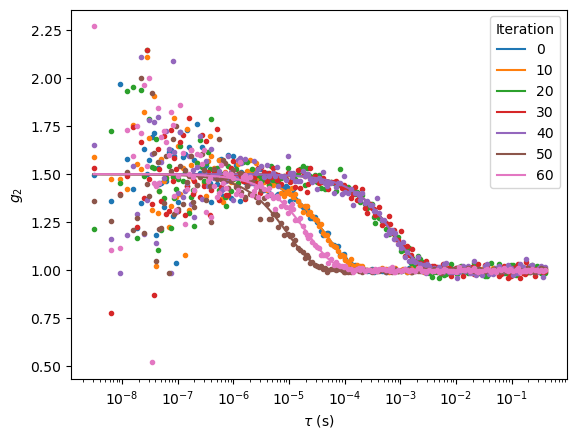

In [73]:
mua = 0.1
musp = 10
rho = 2.5

g1_all = np.zeros((total_dur, len(tau)))
g2_all = np.zeros((total_dur, len(tau)))
g2_all_noisy = np.zeros((total_dur, len(tau)))

# Create noiseless g2_all
# Your code here...
for i in range(total_dur):
    msd = common.msd_brownian(tau, db[i])
    g1_all[i, :] = hsi.g1_norm(msd, mua, musp, rho, n, lambda0)
g2_all = 1 + beta * g1_all**2

# Create noisy g2_all_noisy
t_integration = 1
countrate = 70_000
n_speckle = 1
# Your code here...
noise_adder = noise.NoiseAdder(t_integration, countrate, beta, n_speckle, ensure_decreasing=True)
g2_all_noisy = noise_adder.add_noise(tau, g2_all)

# Plotting a few curves
for i in range(0, total_dur, 10):
    plt.semilogx(tau, g2_all[i, :], color=f"C{i//10}", label=i)
    plt.semilogx(tau, g2_all_noisy[i, :], '.', color=f"C{i//10}")
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$g_2$')
plt.legend(title="Iteration")
plt.show()

## Semi-infinite fitting with Brownian motion

The `inverse.fit.Fitter` class is used by instantiating it with the appropriate parameters and then calling its `fit()` method
to perform the fitting procedure on the data.

First of all, we need to choose the geometric model to use for fitting. This is done by passing the appropriate `g1_norm` function
from the `forward` module as an argument to the `Fitter` class constructor.
In our case, we will use the semi-infinite geometry, so we will pass `forward.homogeneous_semi_inf.g1_norm`.


In [67]:
g1_fitting_function = hsi.g1_norm

Then, we need to define the scatterer motion model to use for fitting. This includes the model itself (e.g., Brownian, ballistic, hybrid),
the initial value of the parameter(s) to fit (e.g., `db` and/or `v_ms`), and their bounds for fitting.
To this end, the `inverse.fit` module provides the `MSDModelFit` class, allowing to define all these aspects in a convenient way.

Let's define a Brownian motion model for fitting, with an initial guess of `1e-8 cm^2/s` for `db` and lower bound `0` (no upper bound).

In [61]:
import fit_dcs.inverse.fit as fit

msd_model = fit.MSDModelFit(model_name="brownian", params_init={"db": 1e-8}, params_bounds={"db": (0, None)})

Then, we need to define how to handle the coherence factor `beta` during fitting. This is done by instantiating the `BetaCalculator` class
from the `inverse.fit` module, which allows to choose between three different modes for estimating `beta`:
- `fixed`: use a fixed value for `beta` during fitting (passed as an argument to the constructor)
- `raw`: estimate `beta` from the raw `g2` data before fitting
- `fit`: treat `beta` as an additional fitting parameter

In our case, since we know the true value of `beta` used to generate the data, we will start simple and use the `fixed` strategy.

In [62]:
beta_calculator = fit.BetaCalculator(mode="fixed", beta_fixed=beta)

To define the fitting range we can pass two more parameters: `tau_lims_fit`, a 2-tuple with the extreme values of `tau` used
for fitting (that is, `g2_norm` is fitted between `tau_lims_fit[0]` and `tau_lims_fit[1]`), and `g2_lim_fit`, the lowest value
of `g2_norm` up to which the fit is done (that is, the points of `g2_norm` after it has crossed `g2_lim_fit` are not used in the
fitting). Both `tau_lims_fit` and `g2_lim_fit` are optional parameters: one can pass both, just one, or neither. If both are
passed, the fitting range will satisfy both of them. If neither is passed, the whole `g2_norm` curve will be used for fitting.

In our case, we will pass both:

In [63]:
tau_lims_fit = (1e-7, 1e-3)
g2_lim_fit = 1.13  # Corresponds to g1 = 0.5 at beta = 0.5

Lastly, we need to pass the other parameters required by the forward model, such as `mua`, `musp`, `rho`, etc. Since these
depend on the geometry, they are passed as keyword arguments to the `Fitter` class constructor, meaning that their names must be
specified and must match the names expected by the `g1_norm` function, but they can be passed in any order.
In our case, we have `mua`, `musp`, `rho`, `n`, and `lambda0`.

Now we have all the ingredients to instantiate the `Fitter` class.

In [64]:
fitter = fit.Fitter(
    g1_fitting_function,
    msd_model,
    beta_calculator,
    tau_lims_fit=tau_lims_fit,
    g2_lim_fit=g2_lim_fit,
    mua=mua,
    musp=musp,
    rho=rho,
    n=n,
    lambda0=lambda0
)

To perform the fit, we call `fitter.fit()`, passing `tau` and the `g2_norm` to fit. Remember that `g2_norm` must be a 2D array
with shape `(n_iterations, len(tau))`.

The output of the `fit()` method is a dictionary containing the fitting results, including the fitted parameters for each iteration,
the estimated `beta` values, the fitted `g2_norm` curves, and more.

Additionally, we can specify a `plot_interval` to plot 1 every `plot_interval` curves to check the fitting.
If `plot_interval` is not passed, or if it is `0`, no plotting is done.

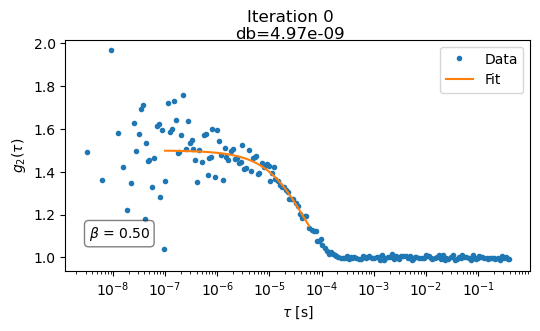

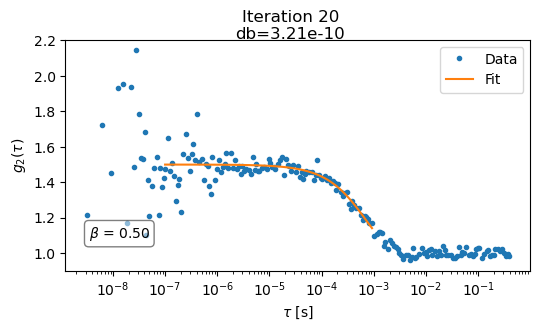

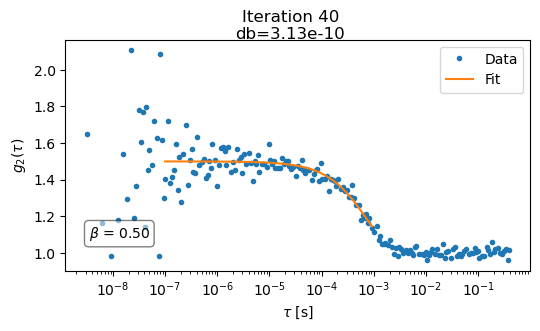

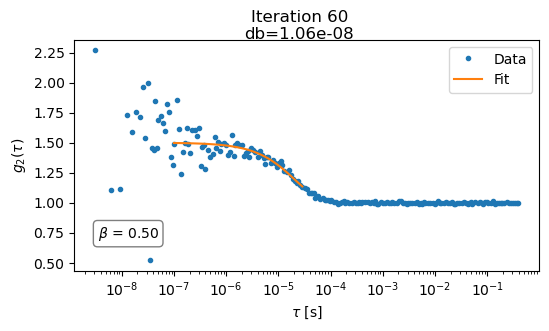

In [74]:
fitted_data = fitter.fit(tau, g2_all_noisy, plot_interval=20)

`fitted_data` is a dictionary containing the fitting results. Its values are 1D arrays with length equal to the number of iterations
(i.e., the first dimension of `g2_norm`). Let's check its keys.

In [71]:
print(fitted_data.keys())

dict_keys(['db', 'beta', 'chi2', 'r2'])


As we can see, it includes the fitted parameters (`db` in our case), the estimated `beta` values, and the `chi2` and `r2` fitting
quality metrics.

Let's plot the fitted `db` values against the ground truth.

In [ ]:
plt.plot(db, label="Ground truth")
plt.plot(fitted_data["db"], '.', label="Fitted")
plt.xlabel("Iteration")
plt.ylabel(r"$D_B$ (cm$^2$/s)")
plt.legend()
plt.show()

Since we fixed `beta` to its ground truth value, the fit worked quite well.

Now try changing the `BetaCalculator` to use the `raw` mode instead of `fixed`, and see how it affects the fitting results.
See the documentation of the `BetaCalculator` class for more details on how to use the `raw` mode.
Remember to re-instantiate the `Fitter` class with the new `BetaCalculator`.

In [ ]:
fitted_data = {"db": np.zeros_like(db), "beta": np.zeros_like(db), "chi2": np.zeros_like(db), "r2": np.zeros_like(db)}

# Your code here...

# Plotting
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(db, label="Ground truth")
axs[0].plot(fitted_data["db"], '.', label="Fitted")
axs[0].set_ylabel(r"$D_B$ (cm$^2$/s)")
axs[0].legend()

axs[1].plot(np.full_like(db, beta), label="Ground truth")
axs[1].plot(fitted_data["beta"], '.', label="Estimated")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel(r"$\beta$")
axs[1].set_ylim(0.4, 0.6)
plt.show()

Since the `raw` mode estimates `beta` from the noisy data before fitting, the results are obviously noisier than in the previous case.
You can try changing the portion of the `g2_norm` curve used for estimating `beta` to see if you can improve the results.

Finally, try using the `fit` mode for the `BetaCalculator`, which treats `beta` as an additional fitting parameter. Again,
see the documentation of the `BetaCalculator` class for more details on how to use the `fit` mode.

In [ ]:
fitted_data = {"db": np.zeros_like(db), "beta": np.zeros_like(db), "chi2": np.zeros_like(db), "r2": np.zeros_like(db)}

# Your code here...

# Plotting
fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(db, label="Ground truth")
axs[0].plot(fitted_data["db"], '.', label="Fitted")
axs[0].set_ylabel(r"$D_B$ (cm$^2$/s)")
axs[0].legend()

axs[1].plot(np.full_like(db, beta), label="Ground truth")
axs[1].plot(fitted_data["beta"], '.', label="Estimated")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel(r"$\beta$")
axs[1].set_ylim(0.4, 0.6)
plt.show()

In this case, fitting `beta` along with `db` yields better results than the `raw` mode.

## Comparison of different geometric models

The `Fitter` class is flexible and allows using different geometric models for fitting by simply passing a different
`g1_norm` function from the `forward` module and adjusting the keyword arguments accordingly.

Let's try to generate the same synthetic data as before, but this time using the slab geometry in transmittance
with thickness `d = 1 cm`.

In [ ]:
rho = 0  # Lateral source-detector separation, in transmittance it's usually 0
d = 1

g1_all = np.zeros((total_dur, len(tau)))
g2_all = np.zeros((total_dur, len(tau)))
g2_all_noisy = np.zeros((total_dur, len(tau)))

# Create noiseless g2_all
# Your code here...

# Create noisy g2_all_noisy
# Your code here...

# Plotting a few curves
for i in range(0, total_dur, 10):
    plt.semilogx(tau, g2_all[i, :], color=f"C{i//10}", label=i)
    plt.semilogx(tau, g2_all_noisy[i, :], '.', color=f"C{i//10}")
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$g_2$')
plt.legend(title="Iteration")
plt.show()

Now try fitting this new dataset using:
- the slab geometry in transmittance
- the semi-infinite geometry with `rho = d` (to mimic transmittance)

In both cases, use the Brownian motion model. You are free to choose the `BetaCalculator` mode and fitting ranges as you prefer.

In [ ]:
fitted_data_slab = {"db": np.zeros_like(db), "beta": np.zeros_like(db), "chi2": np.zeros_like(db), "r2": np.zeros_like(db)}
fitted_data_semi_inf = {"db": np.zeros_like(db), "beta": np.zeros_like(db), "chi2": np.zeros_like(db), "r2": np.zeros_like(db)}

# Your code here...

# Plotting
plt.plot(db, label="Ground truth")
plt.plot(fitted_data_slab["db"], '.', label="Fitted slab")
plt.plot(fitted_data_semi_inf["db"], '.', label="Fitted semi-inf")
plt.xlabel("Iteration")
plt.ylabel(r"$D_B$ (cm$^2$/s)")
plt.legend()
plt.show()

You should observe that the semi-infinite model, while capturing the general trend, underestimates the true `db` values compared
to the slab model. You can try changing the simulation parameters (e.g., optical properties, slab thickness...) to see how they
affect the fitting results.

## Multi-curve fitting